Standard process inputs
============

In [1]:
import sympy
import matplotlib.pyplot as plt
sympy.init_printing()
%matplotlib inline

## Step

A step input of magnitude $M$ can be written as
$$u_S(t)=\begin{cases}
    0&  t<0,\\
    M&  t\geq 0
\end{cases}$$

Sympy supplies a unit step function called `Heaviside`, which is typeset as $\theta(t)$

In [2]:
t = sympy.symbols('t')

In [3]:
S = sympy.Heaviside

In [4]:
M = 2

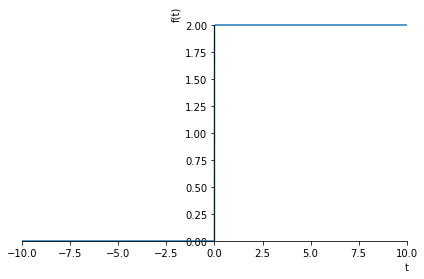

In [5]:
sympy.plot(M*S(t))

## Laplace transform

Sympy can calculate laplace transforms of the step easily:

In [6]:
M, s = sympy.symbols('M, s')

In [7]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [8]:
L(M*S(t))

## Scaling and translation

We can scale and translate the step function in the normal way. Notice that how the time translation is handled.

In [9]:
from ipywidgets import interact

In [10]:
def translated_step(scale, y_translation, t_translation):
    f = scale*S(t - t_translation) + y_translation
    print("f =", f, "  \u2112(f) =", L(f))
    sympy.plot(f, (t, -10, 10), ylim=(-2, 4))

In [11]:
interact(translated_step, 
         scale=(0.5, 3.), 
         y_translation=(-1., 1.), 
         t_translation=(0., 5.));

interactive(children=(FloatSlider(value=1.75, description='scale', max=3.0, min=0.5), FloatSlider(value=0.0, d…

## Rectangular pulse

It is now easy to see how we can construct a rectangular pulse, of height $h$ and width $t_w$,

$$u_{RP}(t)=\begin{cases}
    0&  t<0,\\
    h& 0 \leq t < t_w\\
    0&  t \geq t_w
\end{cases}$$

by using shifted versions of the step, so that

In [12]:
h, t_w = sympy.symbols('h, t_w')
u_RP = h*(S(t - 0) - S(t - t_w))

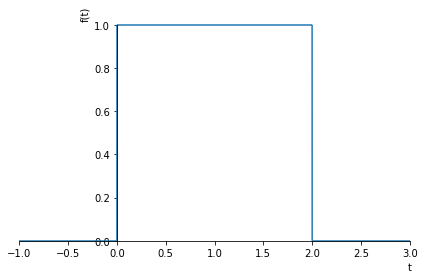

In [13]:
sympy.plot(u_RP.subs({h: 1, t_w: 2}), (t, -1, 3));

In [14]:
L(u_RP)

### Arbitrary piecewise constant functions

We can constuct any piecewise constant function by adding together step functions shifted in time. As an example, we can take the function represented below:

In [15]:
x = [-1, 0, 0, 1, 1, 2, 2, 3]
y = [0, 0, 1, 1, 2, 2, 0, 0]

Text(2, 0.1, '$D_3=2$')

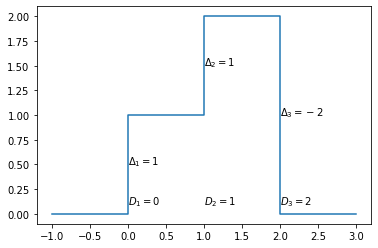

In [16]:
plt.plot(x, y)
plt.text(0, 0.5, r'$\Delta_1=1$')
plt.text(1, 1.5, r'$\Delta_2=1$')
plt.text(2, 1, r'$\Delta_3=-2$')

plt.text(0, 0.1, r'$D_1=0$')
plt.text(1, 0.1, r'$D_2=1$')
plt.text(2, 0.1, r'$D_3=2$')

In general piecewise constant functions like the one above can be written as 

$$f_c(t) = \sum_{i=1}^{N_d} \Delta_i S(t - D_i)$$

where $S$ is the unit step. We calculate $\Delta_i$ as the difference between the values at the discontinuities, positive if the function is rising and negative if it is falling. $D_i$ is the time at which the value changes and $N_d$ is the number of discontinuities.

We can apply this directly for the example function.

In [17]:
f = 1*S(t) + 1*S(t-1) - 2*S(t-2)
f

Or a little more generally using some code:

In [18]:
Delta = [1, 1, -2]
D = [0, 1, 2]
Nd = len(Delta)

In [19]:
f = sum(Delta[i]*S(t - D[i]) for i in range(Nd))

In [20]:
f

Let's verify it works properly:

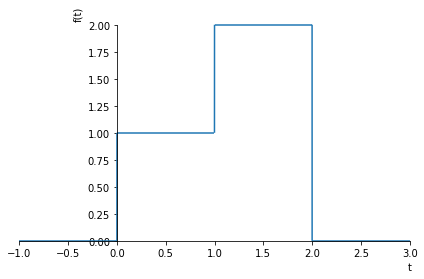

In [21]:
sympy.plot(f, (t, -1, 3));

In [22]:
sympy.expand(L(f))

## Ramp

A ramp with slope $a$ can be written as

$$u_R(t)=\begin{cases}
    0&  t<0,\\
    a&  t\geq 0
\end{cases}$$

We can construct a unit ($a=1$) ramp by simply multiplying the unit step by $t$

In [25]:
def R(t):
    return t*S(t)

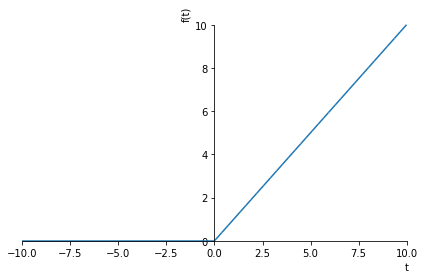

In [26]:
sympy.plot(R(t))

In [27]:
L(R(t))

## Continuous piecewise linear functions

We can build any continuous piecewise linear function by using shifted and scaled ramps.

$$f(t) = \sum_{i=1}^{N_s} \Delta m_i R(t - D_{s,i})$$

This time $\Delta m_i$ represents changes in slopes ($m=\frac{\Delta y}{\Delta x}$). $D_{s,i}$ are the times at which the slopes change and $N_s$ is the number of slope changes.

For instance, we can construct a triangular pulse by adding three ramps together.

In [35]:
r1 = t*S(t - 0)
r2 = -2*(t - t_w/2)*S(t - t_w/2)
r3 = (t - t_w)*S(t - t_w)
u_TP = (r1 + r2 + r3)

In [36]:
u_TP

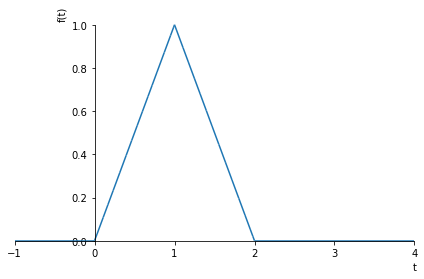

In [37]:
sympy.plot(u_TP.subs({t_w: 2}), (t, -1, 4))

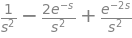

In [31]:
L(u_TP.subs({t_w: 2})).expand()

Notice that there are three ramps here (one may have expected only two). It becomes more clear when we think about the derivative of this function:

In [ ]:
sympy.plot(u_TP.diff(t).subs({t_w: 2}), (t, -1, 4), ylim=(-1.1, 1.1))

We now see that the derivative of a piecewise linear continuous function is a piecewise constant function. We can apply our rule for piecewise constant functions and integrate the steps to ramps:

In [ ]:
derivative = 1*S(t-0) - 2*S(t-1) + 1*S(t-2)

In [ ]:
final = 1*R(t-0) - 2*R(t-1) + 1*R(t-2)

## Arbitrary piecewise linear functions

We can construct any piecewise linear function by adding together ramp functions and steps shifted in time. The general rule now becomes

$$f(t) = \underbrace{\sum_{i=1}^{N_s} \Delta m_i R(t - D_{s,i})}_\text{slope changes} +  \underbrace{\sum_{i=1}^{N_d} \Delta_i S(t - D_i)}_\text{discontinuities}$$



In [ ]:
x = [-1, 0, 2, 2, 3, 4, 5]
y = [0, 0, 1, 2, 2, 0, 0]

In [ ]:
plt.plot(x, y)

We see that there are 4 slope changes (at t=0, t=2, t=3 and t=4) and 1 discontinuity. Applying our formula yields:

In [ ]:
g = 0.5*R(t) - 0.5*R(t-2) - 2*R(t-3) + 2*R(t - 4) + S(t - 2)

In [ ]:
sympy.plot(g, (t, -1, 5));

In [ ]:
sympy.expand(L(g))